In [35]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder    #convert string to number
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data = sns.load_dataset('iris')
data.iloc[70:,-1]

70     versicolor
71     versicolor
72     versicolor
73     versicolor
74     versicolor
          ...    
145     virginica
146     virginica
147     virginica
148     virginica
149     virginica
Name: species, Length: 80, dtype: object

In [70]:
le = LabelEncoder()
#le.fit(['setosa','virginica','versicolor'])
le.fit_transform(data.iloc[:,-1])
df = data.values
df

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [27]:
x = df[:,3]
X = x.reshape((-1,1))
y = df[:,4]
y = (y == 2)   #only verginica species

# logistic regression for one class:


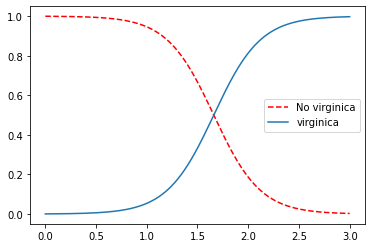

In [75]:

logreg = LogisticRegression()
logreg.fit(X,y)
x_new = np.linspace(0,3,1000).reshape((-1,1))
logreg.predict(x_new)
y_prob = logreg.predict_proba(x_new)    #the output is a probability of being verginica species or not, first column is no
#second column is true
plt.plot(x_new, y_prob[:,0], 'r--', label = 'No virginica')
plt.plot(x_new, y_prob[:,1], label = 'virginica')
plt.legend()

# logistic regression for multiple classes:


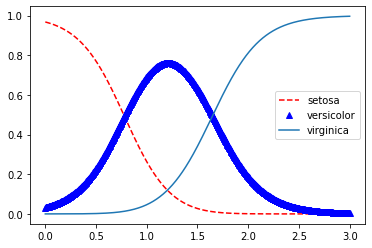

In [119]:

Y = df[:,4]
logreg = LogisticRegression()
logreg.fit(X,Y)
x_new = np.linspace(0,3,1000).reshape((-1,1))
Y_prob = logreg.predict_proba(x_new)
Y_prob
plt.plot(x_new, Y_prob[:,0], 'r--', label = 'setosa')
plt.plot(x_new, Y_prob[:,1],'b ^', label = 'versicolor')
plt.plot(x_new, Y_prob[:,2], label = 'virginica')
plt.legend()


In [132]:
X = df[:,2:4]
Y = df[:,4]
softmax_reg = LogisticRegression(multi_class= 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, Y) #Y has three classes
new_data =np.c_[np.linspace(0,3,1000),np.linspace(3,7,1000)]
softmax_reg.predict(new_data)
print('probability:',softmax_reg.predict_proba(new_data))
sof_prob = softmax_reg.predict_proba(new_data)

probability: [[9.99995180e-01 4.82045690e-06 3.05649546e-11]
 [9.99995109e-01 4.89128223e-06 3.22496518e-11]
 [9.99995037e-01 4.96314817e-06 3.40272070e-11]
 ...
 [1.92031938e-13 1.91429847e-12 1.00000000e+00]
 [1.82000323e-13 1.84095383e-12 1.00000000e+00]
 [1.72492753e-13 1.77041933e-12 1.00000000e+00]]


# meshgrid in logisticRegression:

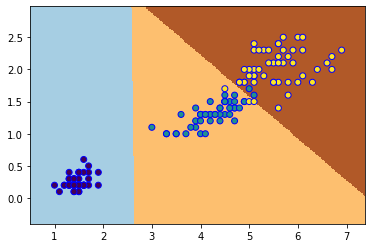

In [152]:
X = df[:,2:4]
Y = df[:,4]
x0_min, x0_max = np.min(df[:,2])- 0.5, np.max(df[:,2]) + 0.5
#x0_min
#x0_max
x1_min, x1_max = np.min(df[:,3])- 0.5, np.max(df[:,3]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min,x0_max, 0.02),np.arange(x1_min,x1_max, 0.02))
z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(df[:,2],df[:,3],edgecolors= 'b', c = Y)